In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_path = './../data/nba_logreg.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
print(data.columns)
print(data.describe())
print(data.isnull().sum())

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')
                GP          MIN          PTS          FGM          FGA  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     60.414179    17.624627     6.801493     2.629104     5.885299   
std      17.433992     8.307964     4.357545     1.683555     3.593488   
min      11.000000     3.100000     0.700000     0.300000     0.800000   
25%      47.000000    10.875000     3.700000     1.400000     3.300000   
50%      63.000000    16.100000     5.550000     2.100000     4.800000   
75%      77.000000    22.900000     8.800000     3.400000     7.500000   
max      82.000000    40.900000    28.200000    10.200000    19.800000   

               FG%      3P Made          3PA          3P%          FTM  \
count  1340.000000  1340.000000  1340.000000  1329.000

In [5]:
data[data['3P%'].isnull()]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


On constate 11 valeurs nulles dans la colonne 3P% qui correespondent aux joueurs qui n'ont pas tiré à 3 points. On va donc remplacer ces valeurs par 0.

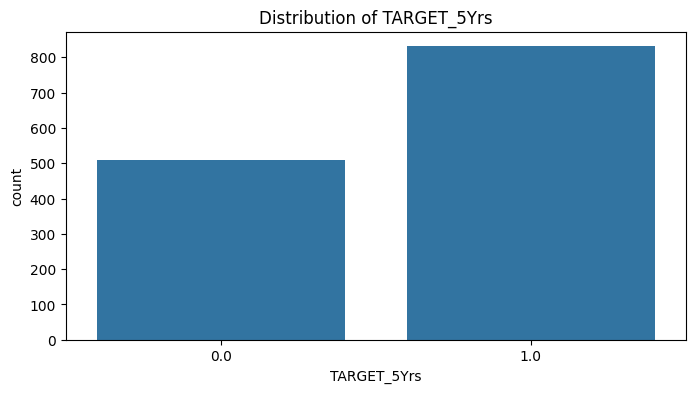

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(x='TARGET_5Yrs', data=data)
plt.title('Distribution of TARGET_5Yrs')
plt.show()

On constate un data set déséquilibré, rééquilibrer le data set sera envisagé.

In [7]:
data[data.duplicated()].sort_values(by='Name')

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
366,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,...,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,0.0
369,Charles Jones,29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,...,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,0.0
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0
166,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1.0
169,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1.0
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
504,Eddie Johnson,74,20.5,9.3,4.0,8.7,45.9,0.0,0.1,9.1,...,2.0,66.4,1.7,2.6,4.4,1.5,0.7,0.2,1.3,1.0
733,Gerald Henderson,43,8.3,2.6,0.9,2.4,35.6,0.1,0.4,21.1,...,1.1,74.5,0.3,0.9,1.3,0.3,0.2,0.2,0.3,1.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
824,Marcus Williams,79,16.6,6.8,2.6,6.7,39.5,0.6,2.1,28.2,...,1.1,84.7,0.4,1.7,2.1,3.3,0.4,0.0,1.8,0.0


On observe des lignes en double.

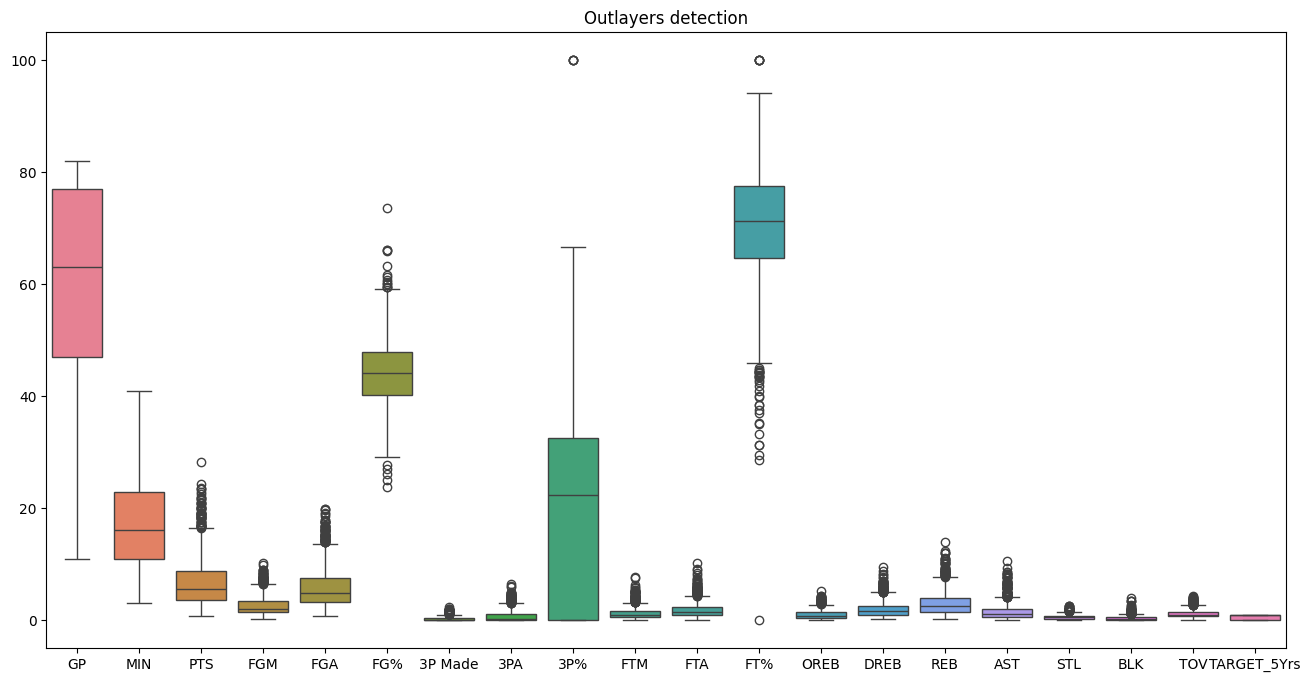

In [8]:
# Outlayers detection for all columns
plt.figure(figsize=(16, 8))
sns.boxplot(data=data)
plt.title('Outlayers detection')
plt.show()

In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin

class DuplicateRemover(BaseEstimator, TransformerMixin):
    def __init__(self, method='DROP_SAME_ROWS'):
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.method == 'DROP_SAME_ROWS':
            X = X.drop_duplicates()
        elif self.method == 'NONE':
            pass
        return X


class NullValueReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=['3P%'], values=[0]):
        self.columns = columns
        self.values = values

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for i in range(len(self.columns)):
            column = self.columns[i]
            if self.values[i] == 'MEDIAN':
                X.loc[:, column] = X.loc[:, column].fillna(X[column].median())
            elif self.values[i] == 'MEAN':
                X.loc[:, column] = X.loc[:, column].fillna(X[column].mean())
            elif self.values[i] == 'MODE':
                X.loc[:, column] = X.loc[:, column].fillna(X[column].mode()[0])
            else:
                X.loc[:, column] = X.loc[:, column].fillna(self.values[i])
        return X



class DataBalancer(BaseEstimator, TransformerMixin):
    def __init__(self, target='TARGET_5Yrs', method='OVERSAMPLING'):
        self.target = target
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.method == 'OVERSAMPLING':
            data_0 = X[X[self.target] == 0]
            data_1 = X[X[self.target] == 1]
            data_0 = data_0.sample(data_1.shape[0], replace=True)
            X = pd.concat([data_0, data_1], axis=0)
        elif self.method == 'UNDERSAMPLING':
            data_0 = X[X[self.target] == 0]
            data_1 = X[X[self.target] == 1]
            data_1 = data_1.sample(data_0.shape[0], replace=True)
            X = pd.concat([data_0, data_1], axis=0)
        elif self.method == 'SMOTE':
            smote = SMOTE(random_state=42)
            y = X[self.target]
            X = X.drop(self.target, axis=1)
            X, y = smote.fit_resample(X, y)
            X = pd.concat([X, y], axis=1)
        elif self.method == 'NONE':
            pass
        else:
            print('No method selected')
        return X.reset_index(drop=True)


class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.feature_names]
    
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        scaler = MinMaxScaler()
        X[self.feature_names] = scaler.fit_transform(X[self.feature_names])
        return X

In [10]:
def select_features(data, target='TARGET_5Yrs', method='corr', threshold=0.1):
    if method == 'corr':
        corr = data.corr()
        corr = corr[target].sort_values(ascending=False)
        corr = corr[abs(corr) > threshold]
        data = data[corr.index]
    elif method == 'rf':
        X = data.drop(target, axis=1)
        y = data[target]
        rf = RandomForestClassifier()
        rf.fit(X, y)
        importances = rf.feature_importances_
        indices = np.argsort(importances)[::-1]
        columns = X.columns
        for i in indices:
            if importances[i] > threshold:
                print(columns[i], ':', importances[i])
        data = data[X.columns[indices]]
    else:
        print('No method selected')
    return data

In [54]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

def score_classifier(dataset,classifier,labels, folds=3):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=folds,random_state=50,shuffle=True)
    confusion_mat_list = []
    recall_list = []
    precision_list = []
    accuracy_list = []
    f1_list = []

    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset.iloc[training_ids]
        training_labels = labels.iloc[training_ids]
        test_set = dataset.iloc[test_ids]
        test_labels = labels.iloc[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)

        confusion_mat = confusion_matrix(test_labels,predicted_labels)
        recall = recall_score(test_labels, predicted_labels)
        precision = precision_score(test_labels, predicted_labels)
        accuracy = classifier.score(test_set, test_labels)
        f1 = 2 * (precision * recall) / (precision + recall)

        recall_list.append(recall)
        precision_list.append(precision)
        accuracy_list.append(accuracy)
        f1_list.append(f1)
        confusion_mat_list.append(confusion_mat)

    recall = np.mean(recall_list)
    precision = np.mean(precision_list)
    accuracy = np.mean(accuracy_list)
    f1 = np.mean(f1_list)
    confusion_mat = np.mean(confusion_mat_list,axis=0).astype(int)

    print(f"confusion_mat: \n {confusion_mat}")
    print(f"recall:{recall}")
    print(f"precision:{precision}")
    print(f"accuracy:{accuracy}")
    print(f"f1:{f1}")
    return {'confusion_mat':confusion_mat,'recall':recall,'precision':precision,'accuracy':accuracy,'f1':f1, 'classifier':classifier}


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB


target = 'TARGET_5Yrs'
balancer_method = 'NONE'

features_selected = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs']
features_to_scale = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']
models = [LogisticRegression(), RandomForestClassifier(), SVC(), XGBClassifier(), \
          KNeighborsClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(), \
          AdaBoostClassifier(), ExtraTreesClassifier(), GaussianNB()]

setps_prepocessing = [('duplicate_remover', DuplicateRemover()), \
    ('null_value_replacer', NullValueReplacer(columns=['3P%'], values=[0])), \
    ('data_balancer', DataBalancer(method=balancer_method)), \
    ('feature_selector', FeatureSelector(feature_names=features_selected)), \
    ('feature_scaler', FeatureScaler(feature_names=features_to_scale))]



pipeline = Pipeline(steps=setps_prepocessing)
data_processed = pipeline.fit_transform(data)
scores = []
for model in models:
    print(f"Model: {model}")
    scores.append(score_classifier(data_processed.drop(target, axis=1), model,data_processed[target]))
    print()

scores = pd.DataFrame(scores)
scores = scores.sort_values(by='f1', ascending=False)
scores



Model: LogisticRegression()
confusion_mat: 
 [[ 88  80]
 [ 47 227]]
recall:0.8271461152756118
precision:0.7392574577642866
accuracy:0.7123428291267887
f1:0.7806680335496549

Model: RandomForestClassifier()
confusion_mat: 
 [[ 90  78]
 [ 59 215]]
recall:0.7846355083765156
precision:0.7338785634052166
accuracy:0.6905031851254133
f1:0.7583440254194862

Model: SVC()
confusion_mat: 
 [[ 90  78]
 [ 47 227]]
recall:0.8274446177323874
precision:0.7441701832638451
accuracy:0.7168575018130191
f1:0.7835325512158953

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None

,confusion_mat,recall,precision,accuracy,f1,classifier
2,"[[90, 78], [47, 227]]",0.827445,0.744170,0.716858,0.783533,SVC()
0,"[[88, 80], [47, 227]]",0.827146,0.739257,0.712343,0.780668,LogisticRegression()
8,"[[91, 76], [57, 217]]",0.792278,0.739271,0.698043,0.764782,"(ExtraTreeClassifier(random_state=255091077), ..."
6,"[[88, 79], [58, 216]]",0.788764,0.731760,0.689751,0.759086,([DecisionTreeRegressor(criterion='friedman_ms...
1,"[[90, 78], [59, 215]]",0.784636,0.733879,0.690503,0.758344,"(DecisionTreeClassifier(max_features='sqrt', r..."
4,"[[90, 77], [64, 210]]",0.766853,0.731350,0.680721,0.748427,KNeighborsClassifier()
3,"[[86, 81], [63, 211]]",0.769632,0.720752,0.673166,0.744344,"XGBClassifier(base_score=None, booster=None, c..."
7,"[[90, 78], [67, 207]]",0.754728,0.726456,0.671684,0.740181,"(DecisionTreeClassifier(max_depth=1, random_st..."
5,"[[84, 84], [90, 184]]",0.672622,0.687715,0.606919,0.679608,DecisionTreeClassifier()
9,"[[137, 31], [134, 140]]",0.510209,0.819392,0.626511,0.628473,GaussianNB()


In [59]:
scores = scores.sort_values(by='recall', ascending=False)
scores


,confusion_mat,recall,precision,accuracy,f1,classifier
2,"[[90, 78], [47, 227]]",0.827445,0.744170,0.716858,0.783533,SVC()
0,"[[88, 80], [47, 227]]",0.827146,0.739257,0.712343,0.780668,LogisticRegression()
8,"[[91, 76], [57, 217]]",0.792278,0.739271,0.698043,0.764782,"(ExtraTreeClassifier(random_state=255091077), ..."
6,"[[88, 79], [58, 216]]",0.788764,0.731760,0.689751,0.759086,([DecisionTreeRegressor(criterion='friedman_ms...
1,"[[90, 78], [59, 215]]",0.784636,0.733879,0.690503,0.758344,"(DecisionTreeClassifier(max_features='sqrt', r..."
3,"[[86, 81], [63, 211]]",0.769632,0.720752,0.673166,0.744344,"XGBClassifier(base_score=None, booster=None, c..."
4,"[[90, 77], [64, 210]]",0.766853,0.731350,0.680721,0.748427,KNeighborsClassifier()
7,"[[90, 78], [67, 207]]",0.754728,0.726456,0.671684,0.740181,"(DecisionTreeClassifier(max_depth=1, random_st..."
5,"[[84, 84], [90, 184]]",0.672622,0.687715,0.606919,0.679608,DecisionTreeClassifier()
9,"[[137, 31], [134, 140]]",0.510209,0.819392,0.626511,0.628473,GaussianNB()


In [60]:
scores = scores.sort_values(by='precision', ascending=False)
scores

,confusion_mat,recall,precision,accuracy,f1,classifier
9,"[[137, 31], [134, 140]]",0.510209,0.819392,0.626511,0.628473,GaussianNB()
2,"[[90, 78], [47, 227]]",0.827445,0.744170,0.716858,0.783533,SVC()
8,"[[91, 76], [57, 217]]",0.792278,0.739271,0.698043,0.764782,"(ExtraTreeClassifier(random_state=255091077), ..."
0,"[[88, 80], [47, 227]]",0.827146,0.739257,0.712343,0.780668,LogisticRegression()
1,"[[90, 78], [59, 215]]",0.784636,0.733879,0.690503,0.758344,"(DecisionTreeClassifier(max_features='sqrt', r..."
6,"[[88, 79], [58, 216]]",0.788764,0.731760,0.689751,0.759086,([DecisionTreeRegressor(criterion='friedman_ms...
4,"[[90, 77], [64, 210]]",0.766853,0.731350,0.680721,0.748427,KNeighborsClassifier()
7,"[[90, 78], [67, 207]]",0.754728,0.726456,0.671684,0.740181,"(DecisionTreeClassifier(max_depth=1, random_st..."
3,"[[86, 81], [63, 211]]",0.769632,0.720752,0.673166,0.744344,"XGBClassifier(base_score=None, booster=None, c..."
5,"[[84, 84], [90, 184]]",0.672622,0.687715,0.606919,0.679608,DecisionTreeClassifier()


In [93]:
target = 'TARGET_5Yrs'
balancer_methods = ['OVERSAMPLING', 'UNDERSAMPLING', 'SMOTE', 'NONE']

features_selected = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs']
features_to_scale = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']
models = [RandomForestClassifier(), SVC(), LogisticRegression(), XGBClassifier()]
          

setps_prepocessing = [
    ('feature_selector', FeatureSelector(feature_names=features_selected)), \
    ('duplicate_remover', DuplicateRemover()), \
    ('null_value_replacer', NullValueReplacer(columns=['3P%'], values=[0])), \
    ('data_balancer', DataBalancer(method=balancer_method)), \
    ('feature_scaler', FeatureScaler(feature_names=features_to_scale))]

scores_equilibration = []


for model in models:
    print(f"Model: {model}")
    for balancer_method in balancer_methods:
        setps_prepocessing = [
    ('feature_selector', FeatureSelector(feature_names=features_selected)), \
    ('duplicate_remover', DuplicateRemover()), \
    ('null_value_replacer', NullValueReplacer(columns=['3P%'], values=[0])), \
    ('data_balancer', DataBalancer(method=balancer_method)), \
    ('feature_scaler', FeatureScaler(feature_names=features_to_scale))]
        pipeline = Pipeline(steps=setps_prepocessing)
        data_processed = pipeline.fit_transform(data)
        print(f"Data balancer method: {balancer_method}")
        score_eq = score_classifier(data_processed.drop(target, axis=1), model,data_processed[target], folds=5)
        score_eq['balancer_method'] = balancer_method
        scores_equilibration.append(score_eq)
        print()
    print("--------------------------------------------------")

scores_equilibration = pd.DataFrame(scores_equilibration)
scores_equilibration = scores_equilibration.sort_values(by='f1', ascending=False)
scores_equilibration



Model: RandomForestClassifier()
Data balancer method: OVERSAMPLING
confusion_mat: 
 [[145  19]
 [ 36 128]]
recall:0.7771752759074124
precision:0.8710733557584867
accuracy:0.8307211936999173
f1:0.8210330456510091

Data balancer method: UNDERSAMPLING
confusion_mat: 
 [[72 28]
 [23 77]]
recall:0.7721337319655076
precision:0.7337849013154035
accuracy:0.7460568444904192
f1:0.751047238787932

Data balancer method: SMOTE
confusion_mat: 
 [[130  34]
 [ 48 116]]
recall:0.7053978450703637
precision:0.7744067706805209
accuracy:0.7487795892051212
f1:0.7366811295329709

Data balancer method: NONE
confusion_mat: 
 [[ 52  48]
 [ 36 128]]
recall:0.7803246277839301
precision:0.7266773340332304
accuracy:0.6814668747340048
f1:0.7516997302458124

--------------------------------------------------
Model: SVC()
Data balancer method: OVERSAMPLING
confusion_mat: 
 [[123  41]
 [ 60 104]]
recall:0.6353949838155477
precision:0.7186512476407346
accuracy:0.6917509440913696
f1:0.6727748651485563

Data balancer meth

,confusion_mat,recall,precision,accuracy,f1,classifier,balancer_method
0,"[[145, 19], [36, 128]]",0.777175,0.871073,0.830721,0.821033,"(DecisionTreeClassifier(max_features='sqrt', r...",OVERSAMPLING
12,"[[138, 26], [38, 126]]",0.769762,0.828252,0.804637,0.797713,"XGBClassifier(base_score=None, booster=None, c...",OVERSAMPLING
7,"[[52, 48], [27, 137]]",0.831011,0.737181,0.711562,0.780612,SVC(),NONE
11,"[[53, 47], [28, 136]]",0.824904,0.740917,0.712342,0.780000,LogisticRegression(),NONE
3,"[[52, 48], [36, 128]]",0.780325,0.726677,0.681467,0.751700,"(DecisionTreeClassifier(max_features='sqrt', r...",NONE
1,"[[72, 28], [23, 77]]",0.772134,0.733785,0.746057,0.751047,"(DecisionTreeClassifier(max_features='sqrt', r...",UNDERSAMPLING
15,"[[52, 48], [39, 125]]",0.759691,0.721374,0.668659,0.739351,"XGBClassifier(base_score=None, booster=None, c...",NONE
2,"[[130, 34], [48, 116]]",0.705398,0.774407,0.748780,0.736681,"(DecisionTreeClassifier(max_features='sqrt', r...",SMOTE
14,"[[125, 39], [49, 115]]",0.700859,0.749135,0.731810,0.723132,"XGBClassifier(base_score=None, booster=None, c...",SMOTE
13,"[[70, 30], [27, 73]]",0.725215,0.707407,0.713329,0.715616,"XGBClassifier(base_score=None, booster=None, c...",UNDERSAMPLING


In [62]:
scores_equilibration = scores_equilibration.sort_values(by='recall', ascending=False)
scores_equilibration

,confusion_mat,recall,precision,accuracy,f1,classifier,balancer_method
7,"[[52, 48], [27, 137]]",0.831011,0.737181,0.711562,0.780612,SVC(),NONE
11,"[[53, 47], [28, 136]]",0.824904,0.740917,0.712342,0.780000,LogisticRegression(),NONE
3,"[[53, 47], [37, 127]]",0.770069,0.726960,0.678442,0.747332,"(DecisionTreeClassifier(max_features='sqrt', r...",NONE
0,"[[146, 18], [39, 125]]",0.761988,0.874090,0.825862,0.813783,"(DecisionTreeClassifier(max_features='sqrt', r...",OVERSAMPLING
1,"[[75, 25], [27, 73]]",0.733120,0.746990,0.739097,0.736290,"(DecisionTreeClassifier(max_features='sqrt', r...",UNDERSAMPLING
2,"[[129, 35], [48, 116]]",0.704332,0.767616,0.743944,0.733297,"(DecisionTreeClassifier(max_features='sqrt', r...",SMOTE
9,"[[71, 29], [32, 68]]",0.681751,0.704767,0.697404,0.691939,LogisticRegression(),UNDERSAMPLING
10,"[[115, 49], [54, 110]]",0.672737,0.695575,0.686904,0.681930,LogisticRegression(),SMOTE
8,"[[118, 46], [54, 110]]",0.669308,0.701974,0.692357,0.684575,LogisticRegression(),OVERSAMPLING
5,"[[73, 27], [33, 67]]",0.664102,0.714001,0.698365,0.686290,SVC(),UNDERSAMPLING


In [63]:
scores_equilibration = scores_equilibration.sort_values(by='precision', ascending=False)
scores_equilibration

,confusion_mat,recall,precision,accuracy,f1,classifier,balancer_method
0,"[[146, 18], [39, 125]]",0.761988,0.874090,0.825862,0.813783,"(DecisionTreeClassifier(max_features='sqrt', r...",OVERSAMPLING
2,"[[129, 35], [48, 116]]",0.704332,0.767616,0.743944,0.733297,"(DecisionTreeClassifier(max_features='sqrt', r...",SMOTE
1,"[[75, 25], [27, 73]]",0.733120,0.746990,0.739097,0.736290,"(DecisionTreeClassifier(max_features='sqrt', r...",UNDERSAMPLING
11,"[[53, 47], [28, 136]]",0.824904,0.740917,0.712342,0.780000,LogisticRegression(),NONE
7,"[[52, 48], [27, 137]]",0.831011,0.737181,0.711562,0.780612,SVC(),NONE
3,"[[53, 47], [37, 127]]",0.770069,0.726960,0.678442,0.747332,"(DecisionTreeClassifier(max_features='sqrt', r...",NONE
6,"[[123, 41], [59, 105]]",0.638506,0.718176,0.692375,0.674530,SVC(),SMOTE
5,"[[73, 27], [33, 67]]",0.664102,0.714001,0.698365,0.686290,SVC(),UNDERSAMPLING
4,"[[122, 42], [61, 103]]",0.629212,0.711133,0.685064,0.665899,SVC(),OVERSAMPLING
9,"[[71, 29], [32, 68]]",0.681751,0.704767,0.697404,0.691939,LogisticRegression(),UNDERSAMPLING


In [65]:
scores_equilibration = scores_equilibration.sort_values(by='accuracy', ascending=False)
scores_equilibration

,confusion_mat,recall,precision,accuracy,f1,classifier,balancer_method
0,"[[146, 18], [39, 125]]",0.761988,0.874090,0.825862,0.813783,"(DecisionTreeClassifier(max_features='sqrt', r...",OVERSAMPLING
2,"[[129, 35], [48, 116]]",0.704332,0.767616,0.743944,0.733297,"(DecisionTreeClassifier(max_features='sqrt', r...",SMOTE
1,"[[75, 25], [27, 73]]",0.733120,0.746990,0.739097,0.736290,"(DecisionTreeClassifier(max_features='sqrt', r...",UNDERSAMPLING
11,"[[53, 47], [28, 136]]",0.824904,0.740917,0.712342,0.780000,LogisticRegression(),NONE
7,"[[52, 48], [27, 137]]",0.831011,0.737181,0.711562,0.780612,SVC(),NONE
5,"[[73, 27], [33, 67]]",0.664102,0.714001,0.698365,0.686290,SVC(),UNDERSAMPLING
9,"[[71, 29], [32, 68]]",0.681751,0.704767,0.697404,0.691939,LogisticRegression(),UNDERSAMPLING
6,"[[123, 41], [59, 105]]",0.638506,0.718176,0.692375,0.674530,SVC(),SMOTE
8,"[[118, 46], [54, 110]]",0.669308,0.701974,0.692357,0.684575,LogisticRegression(),OVERSAMPLING
10,"[[115, 49], [54, 110]]",0.672737,0.695575,0.686904,0.681930,LogisticRegression(),SMOTE


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale'] }

target = 'TARGET_5Yrs'
balancer_method = 'NONE'

features_selected = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs']
features_to_scale = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']
models = [LogisticRegression(), RandomForestClassifier(), SVC(), XGBClassifier(), \
          KNeighborsClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(), \
          AdaBoostClassifier(), ExtraTreesClassifier(), GaussianNB()]

setps_prepocessing = [('duplicate_remover', DuplicateRemover()), \
    ('null_value_replacer', NullValueReplacer(columns=['3P%'], values=[0])), \
    ('data_balancer', DataBalancer(method=balancer_method)), \
    ('feature_selector', FeatureSelector(feature_names=features_selected)), \
    ('feature_scaler', FeatureScaler(feature_names=features_to_scale))]



pipeline = Pipeline(steps=setps_prepocessing)
data_processed = pipeline.fit_transform(data)

scoring_list = ['recall', 'f1']
best_params = {}
for score in scoring_list:
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring=score)
    grid_search.fit(data_processed.drop(target, axis=1), data_processed[target])
    best_params[score] = grid_search.best_params_



Best parameters :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [90]:
best_params

{'recall': {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
 'f1': {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}}

In [92]:


data_processed = pipeline.fit_transform(data)

scores = []
for scoring in scoring_list:
    params = best_params[scoring]
    model = SVC(**params)
    print(f"scoring method: {scoring}")
    score = score_classifier(data_processed.drop(target, axis=1), model, data_processed[target])
    scores.append(score)
    print()

scores = pd.DataFrame(scores)
scores = scores.sort_values(by='f1', ascending=False)




scoring method: recall
confusion_mat: 
 [[ 84  84]
 [ 44 230]]
recall:0.8374519964448023
precision:0.732325401231503
accuracy:0.7093262378749033
f1:0.7811665404589574

scoring method: f1
confusion_mat: 
 [[ 84  84]
 [ 44 230]]
recall:0.8374519964448023
precision:0.732325401231503
accuracy:0.7093262378749033
f1:0.7811665404589574



In [112]:

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
target = 'TARGET_5Yrs'
balancer_method = 'NONE'

features_selected = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs']
features_to_scale = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']
model = SVC()

setps_prepocessing = [('duplicate_remover', DuplicateRemover()), \
    ('null_value_replacer', NullValueReplacer(columns=['3P%'], values=[0])), \
    ('data_balancer', DataBalancer(method=balancer_method)), \
    ('feature_selector', FeatureSelector(feature_names=features_selected)), \
    ('polynomial_features', PolynomialFeatures(2, include_bias=False)), \
    ('select_k_best', SelectKBest(f_classif, k=10)), \
    ('feature_scaler', FeatureScaler(feature_names=features_to_scale)), \
    ('model', model)]



pipeline_processing = Pipeline(steps=setps_prepocessing)
print(pipeline_processing)

Pipeline(steps=[('duplicate_remover', DuplicateRemover()),
                ('null_value_replacer', NullValueReplacer()),
                ('data_balancer', DataBalancer(method='NONE')),
                ('feature_selector',
                 FeatureSelector(feature_names=['GP', 'MIN', 'PTS', 'FGM',
                                                'FGA', 'FG%', '3P Made', '3PA',
                                                '3P%', 'FTM', 'FTA', 'FT%',
                                                'OREB', 'DREB', 'REB', 'AST',
                                                'STL', 'BLK', 'TOV',
                                                'TARGET_5Yrs'])),
                ('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('select_k_best', SelectKBest()),
                ('feature_scaler',
                 FeatureScaler(feature_names=['GP', 'MIN', 'PTS', 'FGM', 'FGA',
                                              'FG%', '3P Made', '3PA', '3P%',
          

In [113]:
hyperparameters = {'polynomial_features__degree': [1, 2, 3, 4], \
                     'select_k_best__k': range(4,100), \
                        'model__C': [0.1, 1, 10, 100], \
                            'model__kernel': ['linear', 'rbf', 'poly'], \
                                'model__gamma': ['scale']}

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

target = 'TARGET_5Yrs'
balancer_method = 'NONE'

features_selected = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs']
features_to_scale = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']

# Define your transformers
duplicate_remover = DuplicateRemover()
null_value_replacer = NullValueReplacer()
data_balancer = DataBalancer()
feature_selector = FeatureSelector(feature_names=features_selected)  # replace with your feature names
feature_scaler = FeatureScaler(feature_names=features_to_scale)  # replace with your feature names

# Define your classifier
clf = SVC()

# Create the pipeline
pipeline_processing	 = Pipeline(steps=[
    ('duplicate_remover', duplicate_remover),
    ('null_value_replacer', null_value_replacer),
    ('data_balancer', data_balancer),
    ('feature_selector', feature_selector),
    ('feature_scaler', feature_scaler),
])

data_processed = pipeline_processing.fit_transform(data)

pipeline = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures(2, include_bias=False)),
    ('select_k_best', SelectKBest(f_classif, k=10)),
    ('classifier', clf)])

# Define the parameter grid for the classifier
param_grid = {'polynomial_features__degree': [1, 2, 3, 4], \
                     'select_k_best__k': range(4, 20), \
                        'classifier__C': [0.1, 1, 10, 100], \
                            'classifier__kernel': ['linear', 'rbf', 'poly'], \
                                'classifier__gamma': ['scale']}

# Create the GridSearchCV object
grid = RandomizedSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(data_processed.drop(target, axis=1), data_processed[target])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomial_features',
                                              PolynomialFeatures(include_bias=False)),
                                             ('select_k_best', SelectKBest()),
                                             ('classifier', SVC())]),
                   param_distributions={'classifier__C': [0.1, 1, 10, 100],
                                        'classifier__gamma': ['scale'],
                                        'classifier__kernel': ['linear', 'rbf',
                                                               'poly'],
                                        'polynomial_features__degree': [1, 2, 3,
                                                                        4],
                                        'select_k_best__k': range(4, 20)})

In [126]:
print(grid.best_params_)

{'select_k_best__k': 16, 'polynomial_features__degree': 3, 'classifier__kernel': 'poly', 'classifier__gamma': 'scale', 'classifier__C': 100}


In [114]:
from sklearn.model_selection import RandomizedSearchCV

grid = RandomizedSearchCV(pipeline_processing, param_distributions=hyperparameters, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(data.drop(target, axis=1), data[target])

print(grid.best_params_)


ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\sklearn\base.py", line 919, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "d:\Documents\Professionnels\Stage_fin_etude\MPDATA\NBA_prediction\venv\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\julie\AppData\Local\Temp\ipykernel_11304\1553731196.py", line 46, in transform
    X.loc[:, column] = X.loc[:, column].fillna(self.values[i])
AttributeError: 'tuple' object has no attribute 'loc'
